# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Fariz Eda Andhika
- **Email:** farizedaa@gmail.com
- **ID Dicoding:** farizeda

## Menentukan Pertanyaan Bisnis

- What are the top-selling product categories?

- Which sellers have the highest sales volume?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel sellers_df, order_items_df, products_df, product_category_translation_df

In [ ]:
# For Business Question 1
order_items_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
product_category_translation_df= pd.read_csv('product_category_name_translation.csv')

# For Business Question 2
sellers_df = pd.read_csv('sellers_dataset.csv')

Head() untuk masing-masing df

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai order_items_df


Melakukan assessment terhadap masing-masing df menggunakan method info()

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83904 entries, 0 to 83903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             83904 non-null  object 
 1   order_item_id        83904 non-null  int64  
 2   product_id           83904 non-null  object 
 3   seller_id            83903 non-null  object 
 4   shipping_limit_date  83903 non-null  object 
 5   price                83903 non-null  float64
 6   freight_value        83903 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.5+ MB


Konsisten pada jumlah non-null count, namun terdapat kesalahan tipe object pada 'shipping_limit_data' yang seharusnya berupa date_time, bukan object.

Pengechekkan missing values

In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

Tampak tidak ada missing values, lanjut ke pengecekkan nilai duplikat:

In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [ ]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,83904,83904.000000,83904,83903,83903,83903.000000,83903.000000
unique,73399,NaN,27505,2913,70362,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,399,1521,21,NaN,NaN
mean,NaN,1.203089,NaN,NaN,NaN,120.684554,20.000353
std,NaN,0.733530,NaN,NaN,NaN,182.823403,15.768032
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.270000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak ada kejanggalan values

#### Menilai products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terlihat terdapat perbedaan jumlah non-null untuk beberapa kolom.

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ternyata terdapat beberapa kolom yang memiliki banyak missing values.

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi pada df ini

In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak ada kejanggalan values

#### Menilai product_category_translation_df

In [ ]:
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Konsisten pada jumlah non-null dan tidak ada keanehan pada Dtype

In [ ]:
product_category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada missing values

In [ ]:
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat

In [ ]:
product_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Karena semua atribute kategorikal dapat dilanjutkan

#### Menilai sellers_df

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Konsisten pada jumlah nilai null, dan Dtype tampak sesuai

In [ ]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada missing values

In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat

In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Mengetahui domain dari data tersebut, dapat diasumsikan tidak ada kejanggalan dari zip code tersebut

### Cleaning Data

#### Membersihkan order_items_df


Mengubah object menjadi dateTime

In [ ]:
column = "shipping_limit_date"
order_items_df[column] = pd.to_datetime(order_items_df[column])

Pengechekkan

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83904 entries, 0 to 83903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             83904 non-null  object        
 1   order_item_id        83904 non-null  int64         
 2   product_id           83904 non-null  object        
 3   seller_id            83903 non-null  object        
 4   shipping_limit_date  83903 non-null  datetime64[ns]
 5   price                83903 non-null  float64       
 6   freight_value        83903 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 4.5+ MB


Dapat terlihat bahwa tipe data sudah berupa menjadi datetime64[ns]

In [ ]:
order_items_df.to_csv('cleaned_order_items.csv', index=False)

#### Membersihkan products_df

Drop missing rows

In [ ]:
# Dropping rows with missing 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'
products_df = products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])


Impute by using median

In [ ]:
for column in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_df[column].fillna(products_df[column].median(), inplace=True)

<ipython-input-28-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(), inplace=True)
<ipython-input-28-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(), inplace=True)
<ipython-input-28-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(

Pengechekkan

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Dataset sudah terlihat bersih :D

## Exploratory Data Analysis (EDA)

Pertama, kita akan menggabungkan order_items_dataset dengan product_dataset untuk mendapatkan informasi kategori produk untuk setiap item pesanan.

In [ ]:
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


karena masih dalam berbentuk kode (tidak terlalu insightful), maka sebaiknya ditambahkan translasi terlebih dahulu

In [ ]:
order_items_products_translated_df = pd.merge(
    order_items_products_df,
    product_category_translation_df,
    left_on='product_category_name',
    right_on='product_category_name',
    how='left'
)

order_items_products_translated_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


Setelah ini, akan melakukan agregat sales volume terhadap kategori

In [ ]:
sales_volume_by_category = order_items_products_translated_df.groupby('product_category_name_english')['price'].sum().reset_index()

Sekarang melakukan sorting untuk melihat top nya

In [ ]:
top_selling_categories = sales_volume_by_category.sort_values(by='price', ascending=False)

top_selling_categories.head()

,product_category_name_english,price
43,health_beauty,921508.21
70,watches_gifts,920328.68
7,bed_bath_table,778606.35
65,sports_leisure,719045.93
15,computers_accessories,675564.50


Selanjutnya, akan mengeksplorasikan Which sellers have the highest sales volume?

Menghitung sales volume dari setip seller

In [ ]:
sales_volume = order_items_df.groupby('seller_id')['price'].sum().reset_index()

Memperoleh top sellers dengan sorting

In [ ]:
top_sellers = sales_volume.sort_values('price', ascending=False)

In [ ]:
top_sellers.head()

,seller_id,price
809,4869f7a5dfa277a7dca6462dcf3b52b2,171047.09
954,53243585a1d6dc2643021fd1853d8905,164705.57
830,4a3ca9315b744ce9f8e9374361493884,149515.28
2848,fa1c13f2614d7b5c4749cbc52fecda94,149237.87
1445,7c67e1448b00f6e969d365cea6b010ab,144133.73


## Visualization & Explanatory Analysis

### Pertanyaan 1:

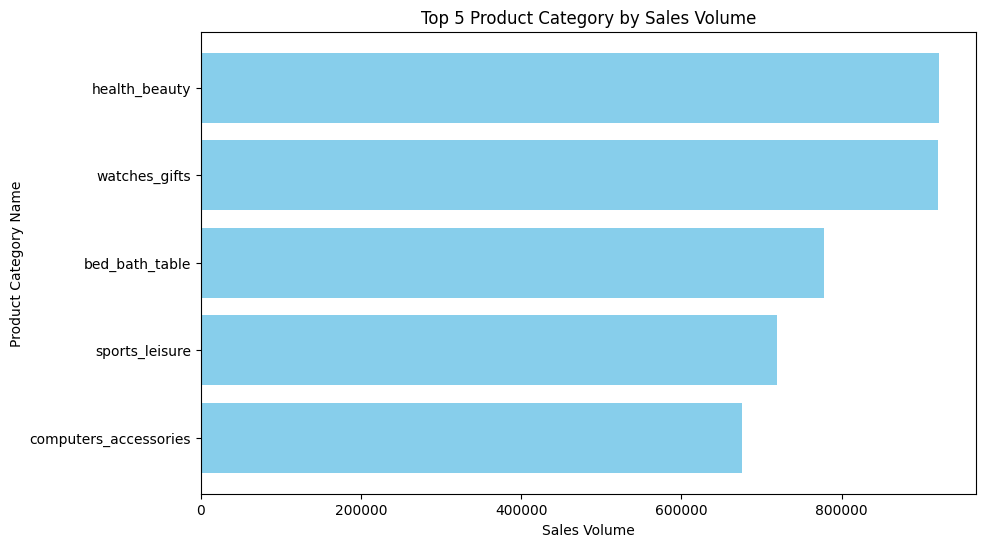

In [ ]:

# Extract top 5 sellers for visualization
top_5_categories = top_selling_categories.head()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_5_categories['product_category_name_english'], top_5_categories['price'], color='skyblue')
plt.xlabel('Sales Volume')
plt.ylabel('Product Category Name')
plt.title('Top 5 Product Category by Sales Volume')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest seller at the top
plt.show()

### Pertanyaan 2:

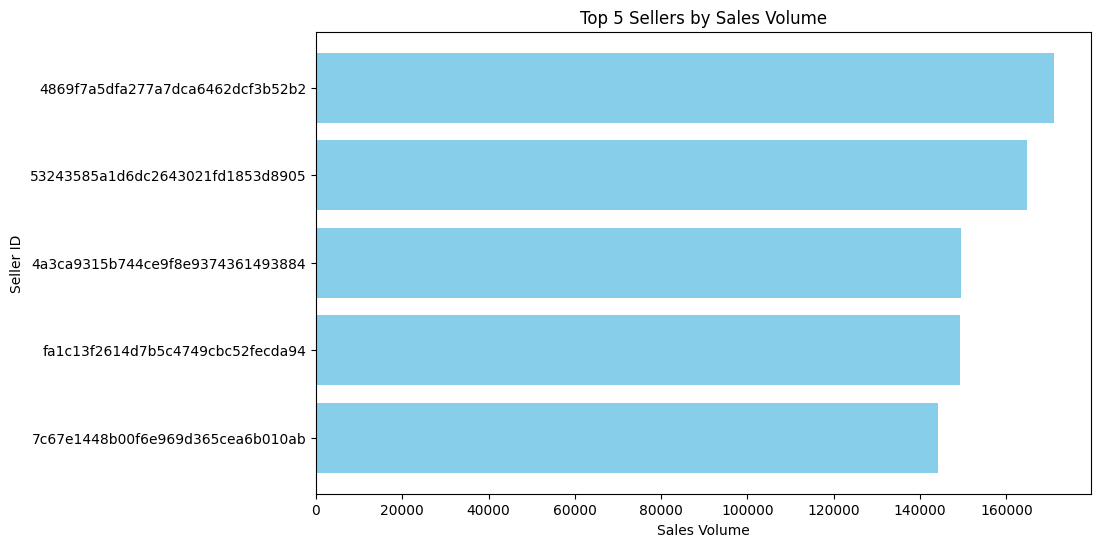

In [ ]:
# Extract top 5 sellers for visualization
top_5_sellers = top_sellers.head()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_5_sellers['seller_id'], top_5_sellers['price'], color='skyblue')
plt.xlabel('Sales Volume')
plt.ylabel('Seller ID')
plt.title('Top 5 Sellers by Sales Volume')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest seller at the top
plt.show()


## Conclusion

- Conclution pertanyaan 1
Kesimpulan dari pertanyaan satu adalah Top 5 Kategori yang memiliki volume penjualan tertinggi adalah health_beauty, watches_gifts, bed_bath_table, sport_leisure, dan computer_accessories


- Conclution pertanyaan 2
Kesimpulan dari pertanyaan kedua adalah Top 5 Seles yang menghasilkan volume penjualan tertinggi adalah

  1. 4869f7a5dfa277a7dca6462dcf3b52b2
  2. 53243585a1d6dc2643021fd1853d8905
  3. 4a3ca9315b744ce9f8e9374361493884
  4. fa1c13f2614d7b5c4749cbc52fecda94
  5. 7c67e1448b00f6e969d365cea6b010ab

In [ ]:
# Exporting

top_sellers.to_csv('top_sellers.csv', index=False)
top_selling_categories.to_csv('top_selling_categories.csv', index=False)